In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
os.getcwd()

'/resources'

## Import the training set

In [3]:
train = pd.read_csv("train2.csv",sep = ",", na_values = ["?"])

### Check the dimension of the training set train

In [4]:
train.shape

(914718, 51)

## Import the testing set 

In [5]:
test = pd.read_csv("test2.csv",sep = ",", na_values = ["?"])

### Check the dimension of the testing set test

In [6]:
test.shape

(261344, 51)

## Import the tunning set 

In [7]:
tune = pd.read_csv("tune2.csv",sep = ",", na_values = ["?"])

### Check the dimension of the tuning set tune

In [8]:
tune.shape

(130659, 51)

## Check the data type 

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914718 entries, 0 to 914717
Data columns (total 51 columns):
Unnamed: 0                   914718 non-null int64
Unnamed: 0.1                 914718 non-null int64
inf_adj_salary               914718 non-null float64
salary                       914718 non-null float64
Part_Time                    914718 non-null int64
Full_Time                    914718 non-null int64
White                        914718 non-null int64
Hispanic_Latino              914718 non-null int64
NativeAmerican               914718 non-null int64
AfricanAmerican              914718 non-null int64
Asian                        914718 non-null int64
Female                       914718 non-null int64
Male                         914718 non-null int64
Sp_Ed_Teacher                914718 non-null int64
Junior_High_Middle_School    914718 non-null int64
HighSchool                   914718 non-null int64
Elementary                   914718 non-null int64
Technical         

There are seven continuous variable besides the target variable. 

"months_employed"
"pct_emp"
"fte"
"dist_exp"
"state_exp"
"out_of_state_exp"
"pct_admin"

## Check if there's any missing values

In [11]:
train.isnull().any()

Unnamed: 0                   False
Unnamed: 0.1                 False
inf_adj_salary               False
salary                       False
Part_Time                    False
Full_Time                    False
White                        False
Hispanic_Latino              False
NativeAmerican               False
AfricanAmerican              False
Asian                        False
Female                       False
Male                         False
Sp_Ed_Teacher                False
Junior_High_Middle_School    False
HighSchool                   False
Elementary                   False
Technical                    False
Special_Education            False
Science                      False
Math                         False
Language                     False
Humanities                   False
Art                          False
sch_zip                      False
DistCode                     False
RCDTS                        False
rcdt                         False
dst_zip             

In [13]:
sum(train.isnull().any())

0

In [14]:
test.isnull().any()

Unnamed: 0                   False
Unnamed: 0.1                 False
inf_adj_salary               False
salary                       False
Part_Time                    False
Full_Time                    False
White                        False
Hispanic_Latino              False
NativeAmerican               False
AfricanAmerican              False
Asian                        False
Female                       False
Male                         False
Sp_Ed_Teacher                False
Junior_High_Middle_School    False
HighSchool                   False
Elementary                   False
Technical                    False
Special_Education            False
Science                      False
Math                         False
Language                     False
Humanities                   False
Art                          False
sch_zip                      False
DistCode                     False
RCDTS                        False
rcdt                         False
dst_zip             

In [15]:
sum(test.isnull().any())

0

In [16]:
tune.isnull().any()

Unnamed: 0                   False
Unnamed: 0.1                 False
inf_adj_salary               False
salary                       False
Part_Time                    False
Full_Time                    False
White                        False
Hispanic_Latino              False
NativeAmerican               False
AfricanAmerican              False
Asian                        False
Female                       False
Male                         False
Sp_Ed_Teacher                False
Junior_High_Middle_School    False
HighSchool                   False
Elementary                   False
Technical                    False
Special_Education            False
Science                      False
Math                         False
Language                     False
Humanities                   False
Art                          False
sch_zip                      False
DistCode                     False
RCDTS                        False
rcdt                         False
dst_zip             

In [17]:
sum(tune.isnull().any())

0

There're no missing values spotted.

## Check for null values for each column

In [18]:
train.isnull().sum()

Unnamed: 0                   0
Unnamed: 0.1                 0
inf_adj_salary               0
salary                       0
Part_Time                    0
Full_Time                    0
White                        0
Hispanic_Latino              0
NativeAmerican               0
AfricanAmerican              0
Asian                        0
Female                       0
Male                         0
Sp_Ed_Teacher                0
Junior_High_Middle_School    0
HighSchool                   0
Elementary                   0
Technical                    0
Special_Education            0
Science                      0
Math                         0
Language                     0
Humanities                   0
Art                          0
sch_zip                      0
DistCode                     0
RCDTS                        0
rcdt                         0
dst_zip                      0
dst_zip_plus4                0
sch_zip_plus4                0
Num_Schools                  0
months_e

## Outlier Analysis on the target variable - Training Set

### Boxplot of the target variable "inf_adj_salary"

In [20]:
import seaborn as sns

In [21]:
sns.set(style="whitegrid")

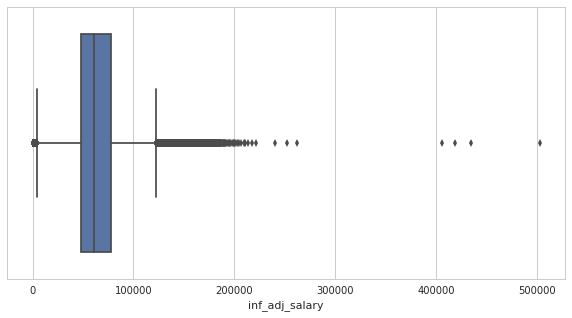

In [22]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x=train["inf_adj_salary"])

We can see large amount of outliers on the higher spectrum. From the boxplot, we can see the distribution is skewed to the right. The part of the box to the left of the median is smaller than the part of the box to the right of the median. 

### Print the specific summary statistics and the histogram

count    914718.000000
mean      64341.627703
std       21958.316379
min           0.042109
25%       48413.562500
50%       60560.681281
75%       77810.330895
max      502947.000000
Name: inf_adj_salary, dtype: float64


/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


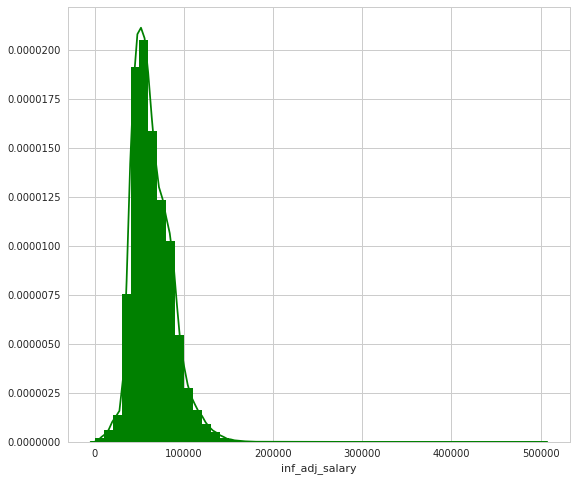

In [24]:
print(train['inf_adj_salary'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train['inf_adj_salary'], color='g', hist_kws={'alpha': 1});

From the histogram, we could also see the distribution is slightly right skewed. 

### Apply log transformation on the inf_adj_salary

In [25]:
train['ln_salary'] = np.log(train["inf_adj_salary"])

### Check the distribution of the log transformed inf_adj_salary

count    914718.000000
mean         11.012100
std           0.360851
min          -3.167491
25%          10.787535
50%          11.011401
75%          11.262029
max          13.128240
Name: ln_salary, dtype: float64


/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


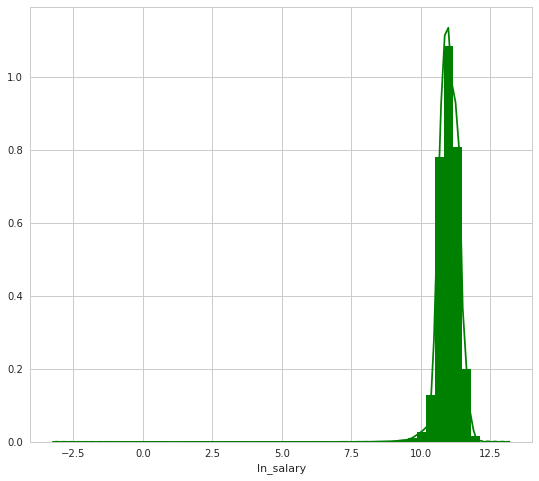

In [26]:
print(train['ln_salary'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train['ln_salary'], color='g', hist_kws={'alpha': 1});

### Create the density curve and box plot for the ln_salary

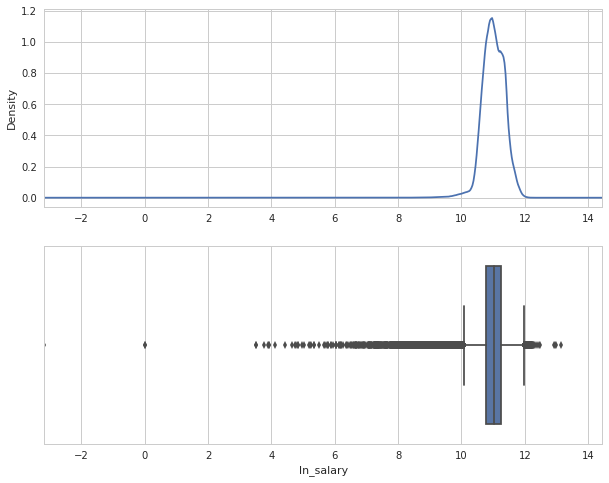

In [27]:
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(train["ln_salary"].min(), train["ln_salary"].max()*1.1)
 
ax = train["ln_salary"].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(train["ln_salary"].min(), train["ln_salary"].max()*1.1)
sns.boxplot(x=train["ln_salary"])

After the log transformation, we could see the distribution is much more normal. The two sides of the box are much more equal. There are significant amount of outliers on the lower end. It makes sense since the log transformation tends to stretch the smaller values. 

### Calculate the 3rd and 1st quartile

In [28]:
q75, q25 = np.percentile(train["ln_salary"].dropna(), [75 ,25])

### Calculate the 1.5 IQR and upper & lower boundaries

In [29]:
iqr = q75 - q25
 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

In [30]:
# display the 3rd and 1st quartile
print(q75,q25)

11.262029489199968 10.787535270403101


In [31]:
# display the lower and upper boundaries for the ln_salary
print(min,max)

10.0757939422078 11.973770817395268


In [32]:
# display the lower and upper boundaries for the inf_adj_salary
print(np.exp(min),np.exp(max))

23760.8356237476 158541.3651944712


### Create the violin plot for the target variable

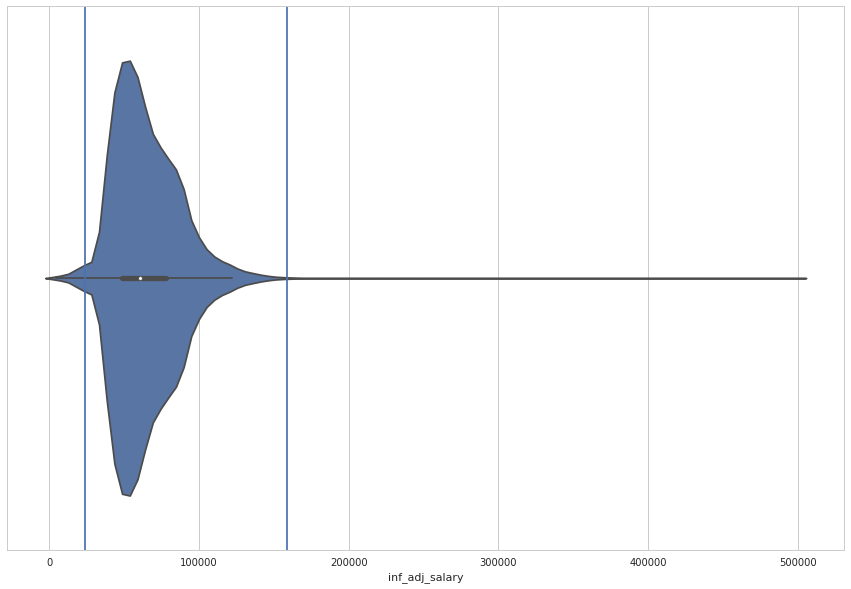

In [33]:
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
ax = sns.violinplot(x=train["inf_adj_salary"])
plt.axvline(x=np.exp(min))
plt.axvline(x=np.exp(max))

Violin plot shows that large chunk of observations are roughly around the 1st quartile not at the median. The overlaid box plot also shows the median is around 60,000. The part of the box to the left of the median is smaller than the part of the box to the right of the median, which indicates right skewed. 

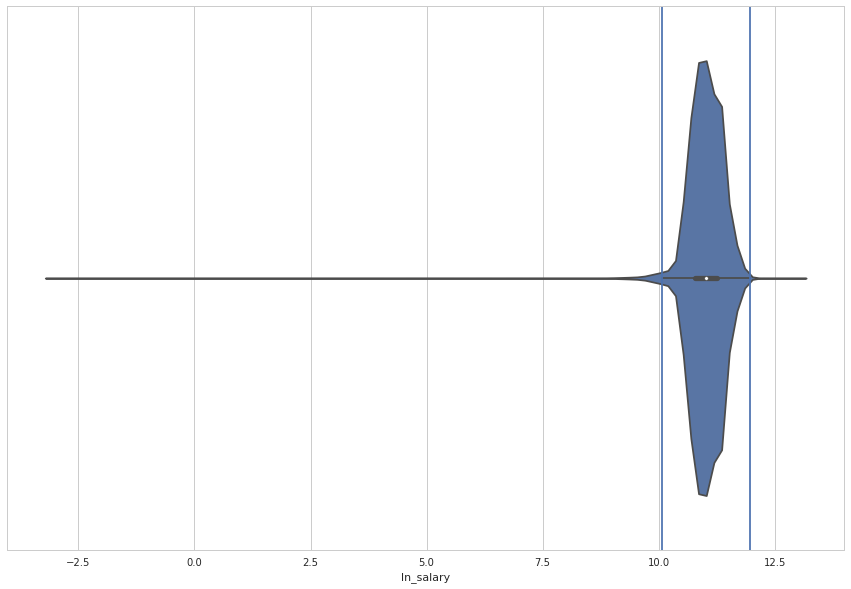

In [34]:
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
ax = sns.violinplot(x=train["ln_salary"])
plt.axvline(x=min)
plt.axvline(x=max)

### Number of teachers who has ln_salary less than the 1.5 IQR of 1st quartile

In [35]:
len(train[(train['ln_salary'] < min)])

11247

### Number of teachers who has ln_salary greater than the 1.5 IQR of 3rd quartile

In [36]:
len(train[(train['ln_salary'] > max)])

726

### Create the density curve and box plot for the ln_salary with the upper and lower boundary bands

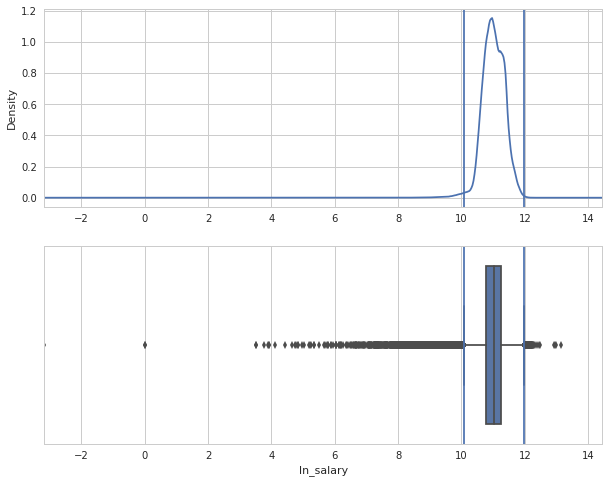

In [37]:
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(train["ln_salary"].min(), train["ln_salary"].max()*1.1)
plt.axvline(x=min)
plt.axvline(x=max)
 
ax = train["ln_salary"].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(train["ln_salary"].min(), train["ln_salary"].max()*1.1)
sns.boxplot(x=train["ln_salary"])
plt.axvline(x=min)
plt.axvline(x=max)

### Calculate the skewness

In [38]:
import scipy as sp

In [39]:
sp.stats.skew(train["inf_adj_salary"])

0.8163227121729697

In [40]:
sp.stats.skew(train["ln_salary"])

-1.2032439348938395

### Remove outliers in the training set train

### Create a new column "Outlier" 

### If the ln_salary is greater than the max, its "Outlier" value will be set as 1

In [44]:
# Create a column "Outlier" and assign values = 0 
train['Outlier'] = 0

In [46]:
# if the observation's ln_salary is greater than the max (max = q75 + (iqr*1.5)), then assign the 'Outlier' value to 1
train.loc[train["ln_salary"] > max, 'Outlier'] = 1

In [47]:
# Number of observations have outlier value == 1 should be 726
len(train[(train['Outlier'] == 1)])

726

In [48]:
# Double Check
train.loc[train["ln_salary"] > max]

,Unnamed: 0,Unnamed: 0.1,inf_adj_salary,salary,Part_Time,Full_Time,White,Hispanic_Latino,NativeAmerican,AfricanAmerican,...,pct_admin,Year,mean inc,2012ADJCPI,EducationECI,Avg Reading,Avg Math,Enrollment,ln_salary,Outlier
1497,1497,987354,167260.513611,146862.89,0,1,1,0,0,0,...,0.0,2006,56303.212210,1.138889,104.1,63.225588,71.815770,100152,12.027308,1
2371,2371,1090284,170141.430289,166658.57,0,1,1,0,0,0,...,0.0,2011,72975.158588,1.020898,116.7,69.564827,73.289935,18868,12.044385,1
3781,3781,1266057,174485.024415,143554.97,0,1,1,0,0,0,...,0.0,2004,35806.114051,1.215458,96.2,55.547619,60.661905,9418,12.069594,1
4064,4064,1152944,187617.604269,183777.00,0,1,1,0,0,0,...,0.0,2011,281196.380697,1.020898,116.7,61.894629,68.468610,802889,12.142161,1
6951,6952,442249,177767.176087,142461.50,0,1,1,0,0,0,...,0.0,2003,87798.807833,1.247826,93.2,59.262500,62.432500,26186,12.088230,1
8712,8713,586135,167626.370278,147184.13,0,1,1,0,0,0,...,0.0,2006,254849.960412,1.138889,104.1,85.181373,89.299216,10268,12.029493,1
9482,9483,365740,176808.929032,150395.40,0,1,1,0,0,0,...,0.0,2005,97013.678652,1.175627,100.0,71.173333,70.440000,26494,12.082825,1
10281,10282,663865,170066.828681,158882.12,0,1,1,0,0,0,...,0.0,2009,67819.575872,1.070396,113.6,76.166991,74.970238,19988,12.043947,1
13640,13643,831,161117.607304,129118.64,0,1,1,0,0,0,...,0.0,2003,64046.205307,1.247826,93.2,67.773485,65.185606,18126,11.989890,1
15061,15065,1011704,161162.426681,132594.00,0,1,1,0,0,0,...,0.0,2004,92431.830581,1.215458,96.2,66.912500,72.617500,26320,11.990168,1


### Check for the outliers in the lower spectrum

#### Number of teachs who had salary less than the 1.5 IQR of 1st quartile (23760.8356237476)

In [49]:
len(train[(train['inf_adj_salary'] < np.exp(min))])

11247

#### Number of teachers who had salary less than the 1.5 IQR of 1st quartile and whose status showed full-time

In [50]:
len(train[(train['inf_adj_salary'] < np.exp(min)) & (train['Full_Time'] == 1)])

4169

#### Number of teachers who had salary less than 1.5 IQR of 1st quartile and whose status showed full-time and who worked only for one school

In [51]:
len(train[(train['inf_adj_salary'] < np.exp(min)) & (train['Full_Time'] == 1) & (train["Num_Schools"] == 1)])

3820

#### Number of teachers who had salary less than 1.5 IQR of 1st quartile and whose status showed full-time and who worked only for one school and whose percentage of employment is 100%

In [52]:
len(train[(train['inf_adj_salary'] < np.exp(min)) & (train['Full_Time'] == 1) 
        & (train["Num_Schools"] == 1) & (train["pct_emp"] == 1)])

3030

#### Number of teachers who had salary less than 1.5 IQR of 1st quartile and whose status showed full-time and who worked only for one school and whose percentage of employment is 100%
#### and whose salary is less than 17160

In [53]:
8.25*8*5*52

17160.0

In [54]:
len(train[(train['Full_Time'] == 1) 
        & (train["Num_Schools"] == 1) & (train["pct_emp"] == 1) & (train['inf_adj_salary'] < 17160)])

1378

#### Number of teachers who had salary less than 1.5 IQR of 1st quartile and whose status showed full-time and who worked only for one school and whose percentage of employment is 100%
#### and whose salary is less than 17000 and who worked more than 8 months

In [55]:
len(train[(train['Full_Time'] == 1) 
        & (train["Num_Schools"] == 1) & (train["pct_emp"] == 1) & (train['inf_adj_salary'] < 17160) 
    & (train["months_employed"] > 8)])

503

#### If the teacher who had salary less than 1.5 IQR of 1st quartile and whose status showed full-time and who worked only for one school and whose percentage of employment is 100%
#### and whose salary is less than 17000 and who worked more than 8 months, his/her "Outlier" value is 1. 

In [56]:
train.loc[(train['Full_Time'] == 1) 
        & (train["Num_Schools"] == 1) & (train["pct_emp"] == 1) & (train['inf_adj_salary'] < 17160) 
    & (train["months_employed"] > 8), "Outlier"] = 1

In [57]:
# Teacher who satisfied above conditions should be 503. 
train.loc[(train['Full_Time'] == 1) 
        & (train["Num_Schools"] == 1) & (train["pct_emp"] == 1) & (train['inf_adj_salary'] < 17160) 
    & (train["months_employed"] > 8)]

,Unnamed: 0,Unnamed: 0.1,inf_adj_salary,salary,Part_Time,Full_Time,White,Hispanic_Latino,NativeAmerican,AfricanAmerican,...,pct_admin,Year,mean inc,2012ADJCPI,EducationECI,Avg Reading,Avg Math,Enrollment,ln_salary,Outlier
3418,3418,733710,11948.157919,11204.00,0,1,1,0,0,0,...,0.0,2008,335298.271976,1.066419,111.3,57.234893,61.060883,780084,9.388332,1
6087,6087,239055,7303.583753,6594.22,0,1,1,0,0,0,...,0.0,2007,43575.163400,1.107574,107.9,68.865616,77.938690,24048,8.896120,1
6284,6284,936319,16888.044749,16542.34,0,1,1,0,0,0,...,0.0,2011,52246.677266,1.020898,116.7,72.856110,79.316577,41058,9.734361,1
6523,6523,610492,11123.816071,10431.00,0,1,1,0,0,0,...,0.0,2008,335298.271976,1.066419,111.3,57.234893,61.060883,780084,9.316844,1
7607,7608,1078921,9563.980000,9563.98,0,1,1,0,0,0,...,0.0,2012,28360.335689,1.000000,118.8,66.750000,79.250000,4087,9.165759,1
8413,8414,733708,15002.381793,14068.00,0,1,1,0,0,0,...,0.0,2008,335298.271976,1.066419,111.3,57.234893,61.060883,780084,9.615964,1
10421,10422,502070,7679.314854,7201.03,0,1,1,0,0,0,...,0.0,2008,37113.781123,1.066419,111.3,77.863732,85.321511,52974,8.946286,1
12953,12955,187285,13004.858333,11418.90,0,1,1,0,0,0,...,0.0,2006,167769.870255,1.138889,104.1,92.740000,96.220000,3472,9.473078,1
15618,15622,1295116,14704.506190,13968.00,0,1,1,0,0,0,...,0.0,2010,442025.544703,1.052728,115.3,58.705945,65.581382,804562,9.595909,1
17372,17377,712493,3198.774444,2808.68,0,1,1,0,0,0,...,0.0,2006,48552.995392,1.138889,104.1,72.180256,79.880023,16921,8.070523,1


In [58]:
# total number of rows with "outlier" == 1 should be 503 + 726 = 1229
train.loc[train["Outlier"] == 1]

,Unnamed: 0,Unnamed: 0.1,inf_adj_salary,salary,Part_Time,Full_Time,White,Hispanic_Latino,NativeAmerican,AfricanAmerican,...,pct_admin,Year,mean inc,2012ADJCPI,EducationECI,Avg Reading,Avg Math,Enrollment,ln_salary,Outlier
1497,1497,987354,167260.513611,146862.89,0,1,1,0,0,0,...,0.0,2006,56303.212210,1.138889,104.1,63.225588,71.815770,100152,12.027308,1
2371,2371,1090284,170141.430289,166658.57,0,1,1,0,0,0,...,0.0,2011,72975.158588,1.020898,116.7,69.564827,73.289935,18868,12.044385,1
3418,3418,733710,11948.157919,11204.00,0,1,1,0,0,0,...,0.0,2008,335298.271976,1.066419,111.3,57.234893,61.060883,780084,9.388332,1
3781,3781,1266057,174485.024415,143554.97,0,1,1,0,0,0,...,0.0,2004,35806.114051,1.215458,96.2,55.547619,60.661905,9418,12.069594,1
4064,4064,1152944,187617.604269,183777.00,0,1,1,0,0,0,...,0.0,2011,281196.380697,1.020898,116.7,61.894629,68.468610,802889,12.142161,1
6087,6087,239055,7303.583753,6594.22,0,1,1,0,0,0,...,0.0,2007,43575.163400,1.107574,107.9,68.865616,77.938690,24048,8.896120,1
6284,6284,936319,16888.044749,16542.34,0,1,1,0,0,0,...,0.0,2011,52246.677266,1.020898,116.7,72.856110,79.316577,41058,9.734361,1
6523,6523,610492,11123.816071,10431.00,0,1,1,0,0,0,...,0.0,2008,335298.271976,1.066419,111.3,57.234893,61.060883,780084,9.316844,1
6951,6952,442249,177767.176087,142461.50,0,1,1,0,0,0,...,0.0,2003,87798.807833,1.247826,93.2,59.262500,62.432500,26186,12.088230,1
7607,7608,1078921,9563.980000,9563.98,0,1,1,0,0,0,...,0.0,2012,28360.335689,1.000000,118.8,66.750000,79.250000,4087,9.165759,1


In [59]:
# Outlier who has salary less than 17610 should be 503
train.loc[(train["Outlier"] == 1) & (train["inf_adj_salary"] < 17160)]

,Unnamed: 0,Unnamed: 0.1,inf_adj_salary,salary,Part_Time,Full_Time,White,Hispanic_Latino,NativeAmerican,AfricanAmerican,...,pct_admin,Year,mean inc,2012ADJCPI,EducationECI,Avg Reading,Avg Math,Enrollment,ln_salary,Outlier
3418,3418,733710,11948.157919,11204.00,0,1,1,0,0,0,...,0.0,2008,335298.271976,1.066419,111.3,57.234893,61.060883,780084,9.388332,1
6087,6087,239055,7303.583753,6594.22,0,1,1,0,0,0,...,0.0,2007,43575.163400,1.107574,107.9,68.865616,77.938690,24048,8.896120,1
6284,6284,936319,16888.044749,16542.34,0,1,1,0,0,0,...,0.0,2011,52246.677266,1.020898,116.7,72.856110,79.316577,41058,9.734361,1
6523,6523,610492,11123.816071,10431.00,0,1,1,0,0,0,...,0.0,2008,335298.271976,1.066419,111.3,57.234893,61.060883,780084,9.316844,1
7607,7608,1078921,9563.980000,9563.98,0,1,1,0,0,0,...,0.0,2012,28360.335689,1.000000,118.8,66.750000,79.250000,4087,9.165759,1
8413,8414,733708,15002.381793,14068.00,0,1,1,0,0,0,...,0.0,2008,335298.271976,1.066419,111.3,57.234893,61.060883,780084,9.615964,1
10421,10422,502070,7679.314854,7201.03,0,1,1,0,0,0,...,0.0,2008,37113.781123,1.066419,111.3,77.863732,85.321511,52974,8.946286,1
12953,12955,187285,13004.858333,11418.90,0,1,1,0,0,0,...,0.0,2006,167769.870255,1.138889,104.1,92.740000,96.220000,3472,9.473078,1
15618,15622,1295116,14704.506190,13968.00,0,1,1,0,0,0,...,0.0,2010,442025.544703,1.052728,115.3,58.705945,65.581382,804562,9.595909,1
17372,17377,712493,3198.774444,2808.68,0,1,1,0,0,0,...,0.0,2006,48552.995392,1.138889,104.1,72.180256,79.880023,16921,8.070523,1


### Remove the 1229 outliers

In [60]:
# Get names of indexes for which column Outlier has value 1
indexNames_train = train[train['Outlier'] == 1].index

In [61]:
indexNames_train

Int64Index([  1497,   2371,   3418,   3781,   4064,   6087,   6284,   6523,
              6951,   7607,
            ...
            903696, 905519, 906267, 907305, 908914, 908981, 909145, 913006,
            913360, 914373],
           dtype='int64', length=1229)

In [62]:
# Delete these row indexes from dataFrame
train_noOut = train.drop(indexNames_train , inplace=False)

### Save to the copy tsr_noOut: teacher salary training set with outliers removed

In [63]:
# With outliers removed, there are 914718 - 1229 = 913489
train_noOut.shape

(913489, 53)

In [64]:
train.shape

(914718, 53)

In [69]:
# Double check train_noOut should have zero row with 'Outlier' == 1
train_noOut[train_noOut['Outlier'] == 1]

# Double check train_noOut should have 913489 rows with 'Outlier' == 0
len(train_noOut[train_noOut['Outlier'] != 1])

913489

### write train_noOut to .csv

In [70]:
train_noOut.to_csv("train_clean.csv")

In [89]:
# Double check
t1 = pd.read_csv("train_clean.csv",sep = ",", na_values = ["?"])

In [91]:
t1.shape

(913489, 54)

## Outlier analysis on other variables

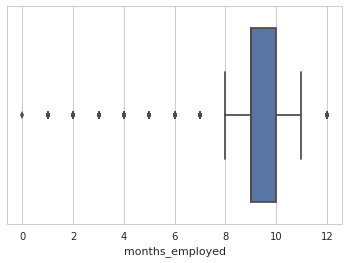

In [71]:
ax = sns.boxplot(x=train_noOut["months_employed"])

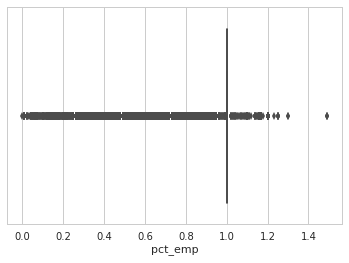

In [72]:
ax = sns.boxplot(x=train_noOut["pct_emp"])

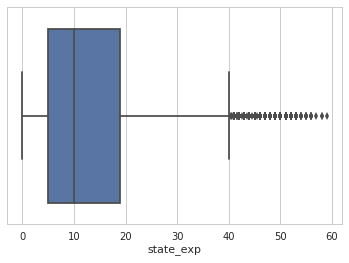

In [73]:
ax = sns.boxplot(train_noOut["state_exp"])

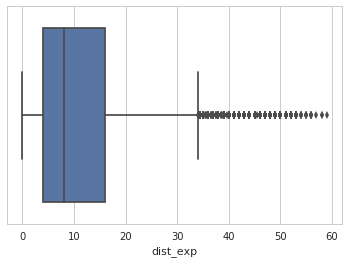

In [74]:
ax = sns.boxplot(x=train_noOut["dist_exp"])

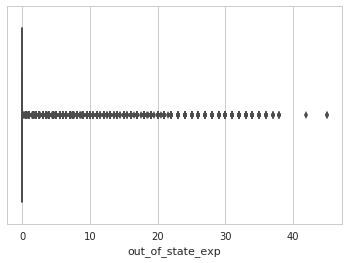

In [75]:
ax = sns.boxplot(x=train_noOut["out_of_state_exp"])

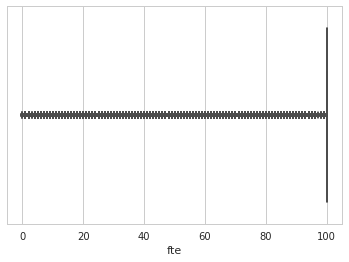

In [76]:
ax = sns.boxplot(x=train_noOut["fte"])

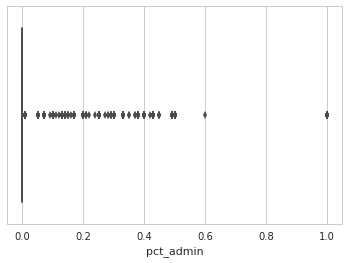

In [77]:
ax = sns.boxplot(x=train_noOut["pct_admin"])

In [79]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [80]:
x = train_noOut["out_of_state_exp"]
y = train_noOut['inf_adj_salary']

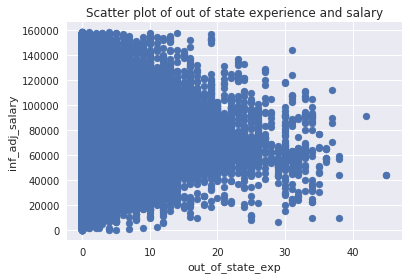

In [81]:
plt.scatter(x, y, alpha = 1)
plt.xlabel('out_of_state_exp')
plt.ylabel('inf_adj_salary')
plt.title('Scatter plot of out of state experience and salary')
plt.show()

In [82]:
x = train_noOut["months_employed"]
y = train_noOut['inf_adj_salary']

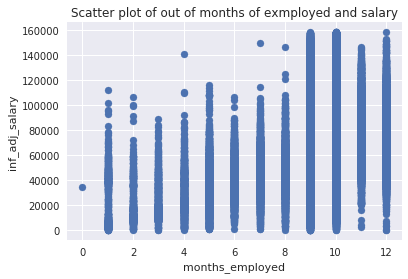

In [83]:
plt.scatter(x, y, alpha = 1)
plt.xlabel('months_employed')
plt.ylabel('inf_adj_salary')
plt.title('Scatter plot of out of months of exmployed and salary')
plt.show()

In [84]:
x = train_noOut["pct_emp"]
y = train_noOut['inf_adj_salary']

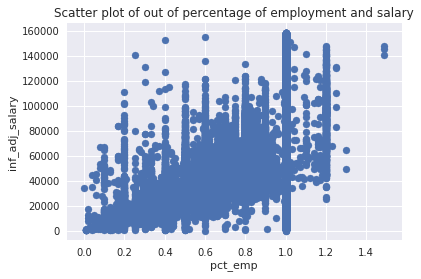

In [85]:
plt.scatter(x, y, alpha = 1)
plt.xlabel('pct_emp')
plt.ylabel('inf_adj_salary')
plt.title('Scatter plot of out of percentage of employment and salary')
plt.show()

## Correlation plot

In [86]:
corr = train_noOut.corr()

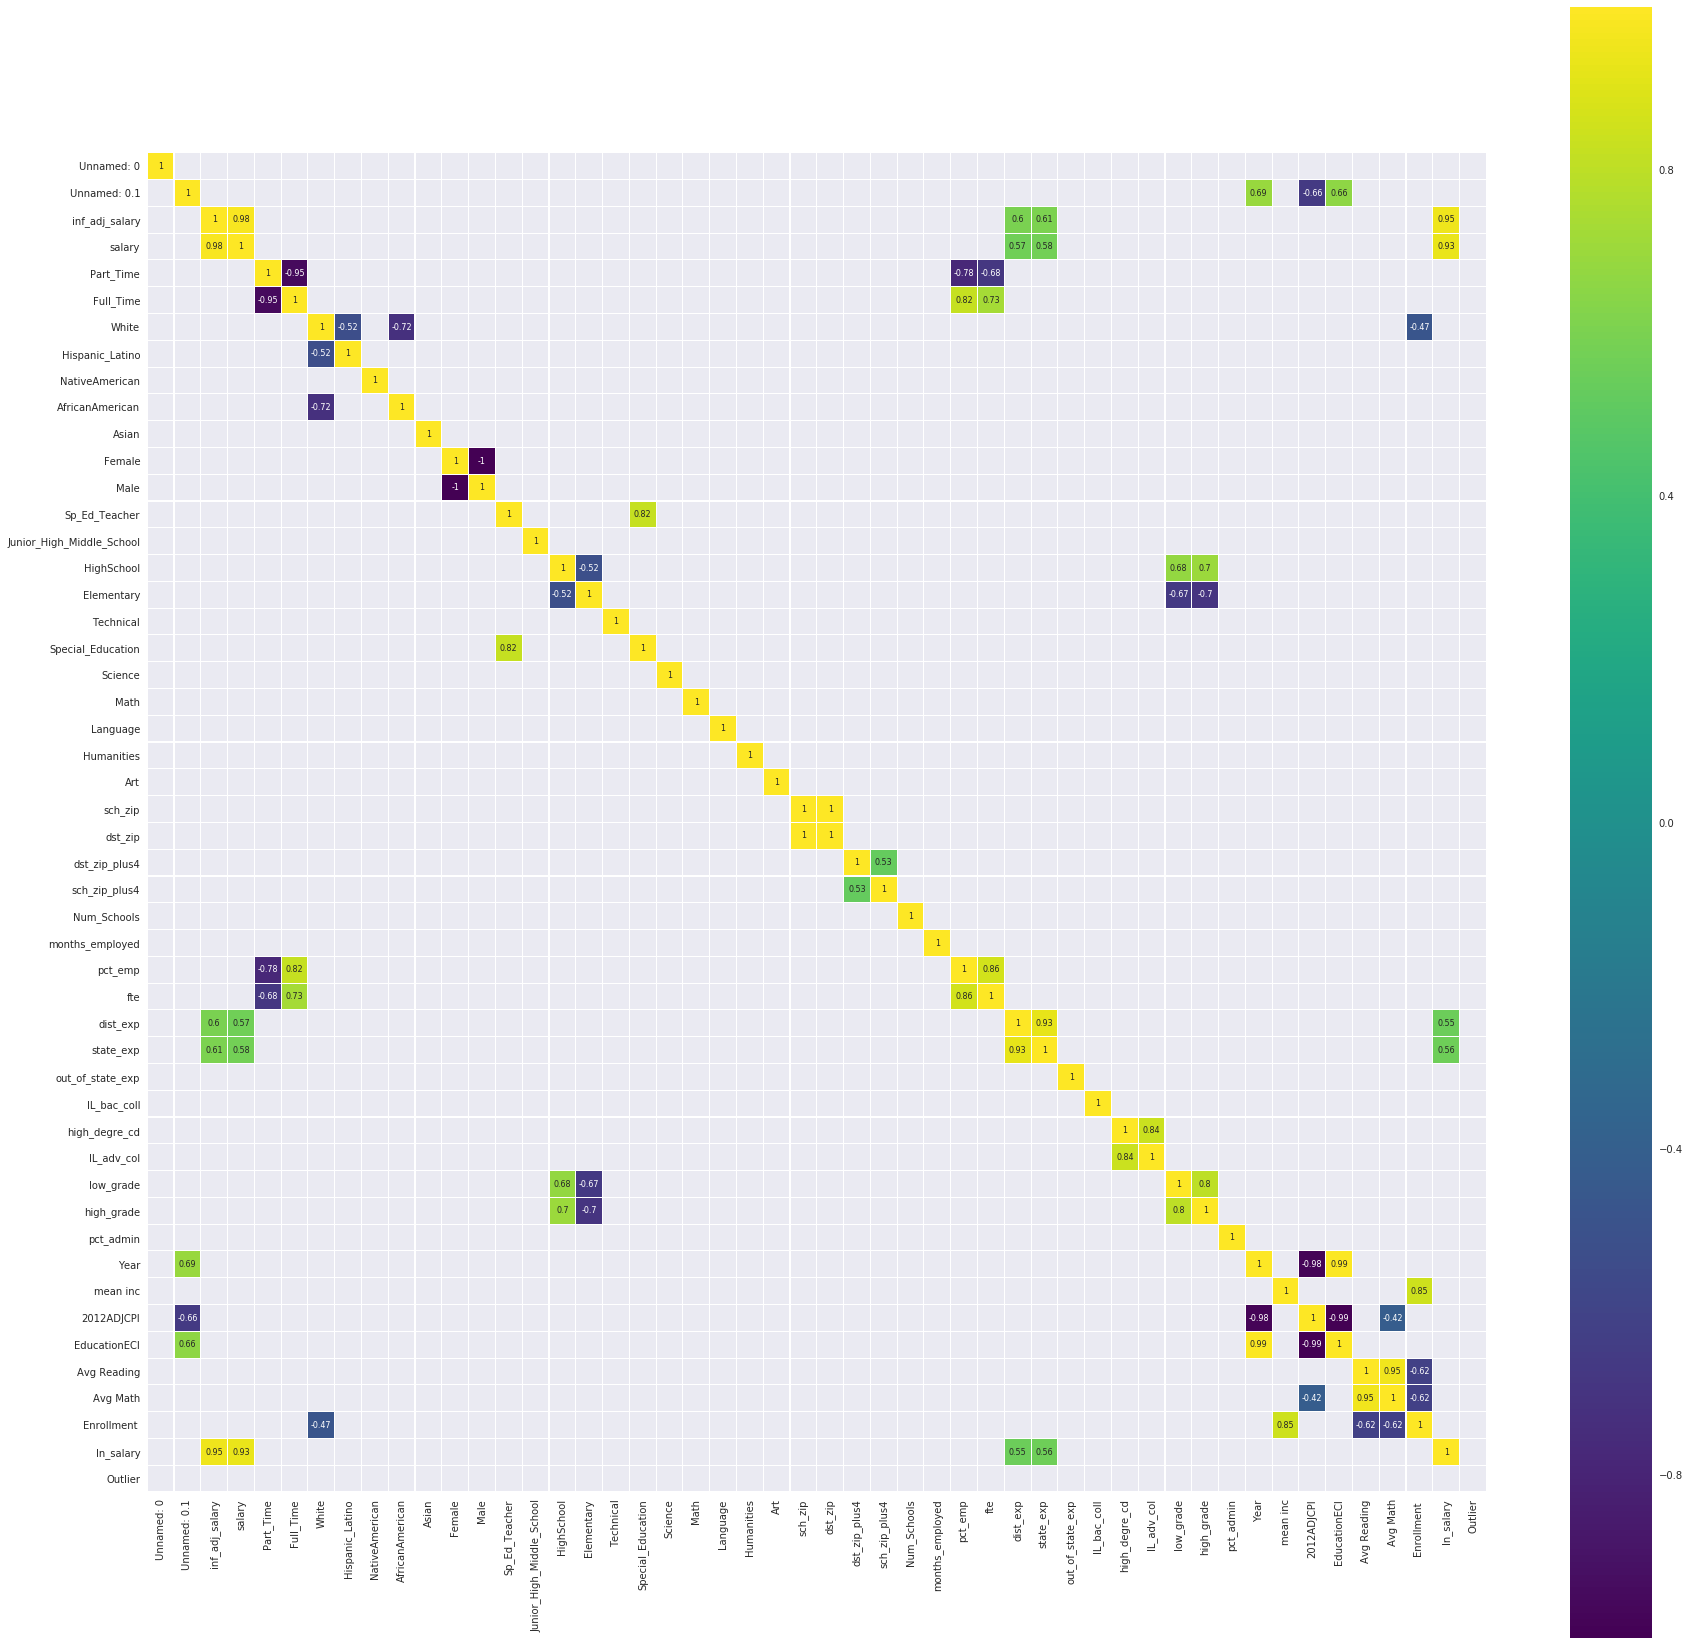

In [87]:
plt.figure(figsize=(30, 30))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

### Remove outliers on the testing set - test

#### Apply log transformation on the inf_adj_salary

In [136]:
test.shape

(261344, 53)

In [88]:
test['ln_salary'] = np.log(test["inf_adj_salary"])

In [94]:
print(test['ln_salary'].describe())

count    261344.000000
mean         11.012700
std           0.359684
min           3.843625
25%          10.787314
50%          11.011799
75%          11.262527
max          13.124135
Name: ln_salary, dtype: float64


#### Calculate the 3rd and 1st quartile

In [92]:
q75_test, q25_test = np.percentile(test["ln_salary"].dropna(), [75 ,25])

In [93]:
print(q75_test, q25_test)

11.262527132960948 10.787314391917974


#### Calculate the 1.5 IQR upper and lower boundary

In [95]:
iqr_test = q75_test - q25_test
 
min_test = q25_test - (iqr_test*1.5)
max_test = q75_test + (iqr_test*1.5)

In [96]:
print(min_test, max_test)

10.074495280353513 11.975346244525408


In [97]:
# display the lower and upper boundaries for the inf_adj_salary
print(np.exp(min_test),np.exp(max_test))

23729.998360819558 158791.33241331618


#### Number of teacher who has ln_salary less than the min_test

In [98]:
len(test[(test['ln_salary'] < min_test)])

3071

#### Number of teacher who has ln_salary greater than max_test

In [99]:
len(test[(test['ln_salary'] > max_test)])

170

#### Create a new column "Outlier" 

#### If the ln_salary is greater than the max, its "Outlier" value will be set as 1

In [105]:
# Create a column "Outlier" and assign values = 0 
test['Outlier'] = 0

In [106]:
# if the observation's ln_salary is greater than the max (max = q75 + (iqr*1.5)), then assign the 'Outlier' value to 1
test.loc[test["ln_salary"] > max_test, 'Outlier'] = 1

In [107]:
# Number of observations have outlier value == 1 should be 170
len(test[(test['Outlier'] == 1)])

170

In [108]:
# Double Check
test.loc[test["ln_salary"] > max_test]

,Unnamed: 0,Unnamed: 0.1,inf_adj_salary,salary,Part_Time,Full_Time,White,Hispanic_Latino,NativeAmerican,AfricanAmerican,...,pct_admin,Year,mean inc,2012ADJCPI,EducationECI,Avg Reading,Avg Math,Enrollment,ln_salary,Outlier
567,567,1288488,160935.472389,152874.68,0,1,1,0,0,0,...,0.0,2010,127785.098086,1.052728,115.3,77.544093,83.372825,72174,11.988759,1
1831,1832,1089911,164884.600978,161509.35,0,1,1,0,0,0,...,0.0,2011,65948.780996,1.020898,116.7,62.925000,68.275000,16277,12.013001,1
3067,3068,931445,173572.087150,170019.00,0,1,0,0,0,1,...,0.0,2011,217936.173027,1.020898,116.7,86.775000,86.566667,9296,12.064348,1
3924,3926,628060,186731.896807,168595.48,0,1,1,0,0,0,...,0.2,2007,365004.005340,1.107574,107.9,69.068817,83.762366,33523,12.137429,1
9730,9737,376957,162120.734696,129922.54,0,1,1,0,0,0,...,0.0,2003,87798.807833,1.247826,93.2,70.865661,76.432471,53383,11.996097,1
10743,10750,647250,160736.195096,150165.13,0,1,1,0,0,0,...,0.0,2009,101049.669604,1.070396,113.6,70.500000,78.067687,33924,11.987520,1
11435,11443,233529,163132.387097,138762.00,0,1,1,0,0,0,...,0.0,2005,48391.119374,1.175627,100.0,66.221429,66.121429,6704,12.002317,1
13966,13975,1269652,168579.710151,160136.04,0,1,1,0,0,0,...,0.0,2010,215595.223801,1.052728,115.3,88.216667,87.608333,9144,12.035164,1
14151,14160,1229207,168034.400000,147542.40,0,1,1,0,0,0,...,0.0,2006,487486.055377,1.138889,104.1,81.106161,85.462560,55277,12.031924,1
16156,16165,1091422,187419.236699,175093.32,0,1,1,0,0,0,...,0.0,2009,67819.575872,1.070396,113.6,76.166991,74.970238,19988,12.141103,1


#### Check the lower spectrum

#### Number of teachers who had salary less than 1.5 IQR of 1st quartile and whose status showed full-time and who worked only for one school and whose percentage of employment is 100%
#### and whose salary is less than 17000 and who worked more than 8 months

In [110]:
len(test[(test['inf_adj_salary'] < np.exp(min_test))])

3071

In [111]:
len(test[(test['inf_adj_salary'] < np.exp(min_test)) & (test['Full_Time'] == 1)])

1154

In [112]:
len(test[(test['inf_adj_salary'] < np.exp(min_test)) & (test['Full_Time'] == 1) & (test["Num_Schools"] == 1)])

1037

In [113]:
len(test[(test['inf_adj_salary'] < np.exp(min_test)) & (test['Full_Time'] == 1) 
        & (test["Num_Schools"] == 1) & (test["pct_emp"] == 1)])

831

In [114]:
len(test[(test['Full_Time'] == 1) 
        & (test["Num_Schools"] == 1) & (test["pct_emp"] == 1) & (test['inf_adj_salary'] < 17160)])

387

In [109]:
len(test[(test['Full_Time'] == 1) 
        & (test["Num_Schools"] == 1) & (test["pct_emp"] == 1) & (test['inf_adj_salary'] < 17160) 
    & (test["months_employed"] > 8)])

163

#### If the teacher who had salary less than 1.5 IQR of 1st quartile and whose status showed full-time and who worked only for one school and whose percentage of employment is 100%
#### and whose salary is less than 17000 and who worked more than 8 months, his/her "Outlier" value is 1. 

In [116]:
test.loc[(test['Full_Time'] == 1) 
        & (test["Num_Schools"] == 1) & (test["pct_emp"] == 1) & (test['inf_adj_salary'] < 17160) 
    & (test["months_employed"] > 8), "Outlier"] = 1

In [117]:
# Teacher who satisfied above conditions should be 163. 
len(test.loc[(test['Full_Time'] == 1) 
        & (test["Num_Schools"] == 1) & (test["pct_emp"] == 1) & (test['inf_adj_salary'] < 17160) 
    & (test["months_employed"] > 8)])

163

In [119]:
# total number of rows with "outlier" == 1 should be 170 + 163 = 333
len(test.loc[test["Outlier"] == 1])

333

In [121]:
# Outlier who has salary less than 17610 should be 163
len(test.loc[(test["Outlier"] == 1) & (test["inf_adj_salary"] < 17160)])

163

#### Remove the 333 outliers from the testing set - test

In [122]:
# Get names of indexes for which column Outlier has value 1
indexNames_test = test[test['Outlier'] == 1].index

In [123]:
indexNames_test

Int64Index([   567,   1831,   3067,   3924,   3985,   4172,   5581,   7852,
              8489,   9730,
            ...
            253165, 253282, 253405, 255055, 255575, 255908, 256253, 258073,
            259336, 260857],
           dtype='int64', length=333)

In [124]:
# Delete these row indexes from dataFrame
test_noOut = test.drop(indexNames_test, inplace=False)

In [125]:
# With outliers removed, there are 261344 - 333 = 261011
test_noOut.shape

(261011, 53)

In [126]:
test.shape

(261344, 53)

In [129]:
# Double check test_noOut should have zero row with 'Outlier' == 1
len(test_noOut[test_noOut['Outlier'] == 1])

0

In [130]:
# Double check test_noOut should have 261011 rows with 'Outlier' == 0
len(test_noOut[test_noOut['Outlier'] != 1])

261011

#### Write to test_clean.csv

In [131]:
test_noOut.to_csv("test_clean.csv")

In [132]:
# Double check
t2 = pd.read_csv("test_clean.csv",sep = ",", na_values = ["?"])

In [133]:
t2.shape

(261011, 54)

### Remove outliers on the tuning set - tune

#### Apply the log transformation on inf_adj_salary

In [135]:
tune.shape

(130659, 52)

In [134]:
tune['ln_salary'] = np.log(tune["inf_adj_salary"])

In [137]:
print(tune['ln_salary'].describe())

count    130659.000000
mean         11.012179
std           0.360350
min           2.836895
25%          10.786954
50%          11.009865
75%          11.262011
max          12.283526
Name: ln_salary, dtype: float64


#### Calculate the 3rd and 1st quartile

In [138]:
q75_tune, q25_tune = np.percentile(tune["ln_salary"].dropna(), [75 ,25])

In [139]:
print(q75_tune, q25_tune)

11.262011476521277 10.786953790385585


#### Calculate the 1.5 IQR upper and lower boundary

In [140]:
iqr_tune = q75_tune - q25_tune
 
min_tune = q25_tune - (iqr_tune*1.5)
max_tune = q75_tune + (iqr_tune*1.5)

In [141]:
print(min_tune, max_tune)

10.074367261182047 11.974598005724815


In [142]:
# display the lower and upper boundaries for the inf_adj_salary
print(np.exp(min_tune),np.exp(max_tune))

23726.960660536595 158672.56301668327


#### Number of teacher who has ln_salary less than the min_tune

In [143]:
len(tune[(tune['ln_salary'] < min_tune)])

1565

#### Number of teacher who has ln_salary greater than the max_tune

In [144]:
len(tune[(tune['ln_salary'] > max_tune)])

95

#### Create a new column "Outlier" 

#### If the ln_salary is greater than the max, its "Outlier" value will be set as 1

In [145]:
# Create a column "Outlier" and assign values = 0 
tune['Outlier'] = 0

In [146]:
# if the observation's ln_salary is greater than the max (max = q75 + (iqr*1.5)), then assign the 'Outlier' value to 1
tune.loc[tune["ln_salary"] > max_tune, 'Outlier'] = 1

In [147]:
# Number of observations have outlier value == 1 should be 95
len(tune[(tune['Outlier'] == 1)])

95

In [148]:
# Double Check
tune.loc[tune["ln_salary"] > max_tune]

,Unnamed: 0,Unnamed: 0.1,inf_adj_salary,salary,Part_Time,Full_Time,White,Hispanic_Latino,NativeAmerican,AfricanAmerican,...,pct_admin,Year,mean inc,2012ADJCPI,EducationECI,Avg Reading,Avg Math,Enrollment,ln_salary,Outlier
264,264,745374,168341.546939,157856.86,0,1,1,0,0,0,...,0.00,2008,71622.188551,1.066419,111.3,71.894589,75.944913,19938,12.033750,1
1944,1945,800329,158705.788866,143291.42,0,1,1,0,0,0,...,0.00,2007,162091.433000,1.107574,107.9,68.023810,71.376740,12386,11.974807,1
4004,4005,1183033,177092.827584,168222.76,0,1,1,0,0,0,...,0.00,2010,351880.412890,1.052728,115.3,72.728125,84.303646,33299,12.084429,1
5593,5595,1089786,163638.707052,160288.96,0,1,1,0,0,0,...,0.00,2011,217936.173027,1.020898,116.7,86.775000,86.566667,9296,12.005416,1
6230,6232,1255216,164738.340000,164738.34,0,1,1,0,0,0,...,0.00,2012,52960.956036,1.000000,118.8,61.825000,68.600000,7246,12.012114,1
6703,6706,291931,163862.026087,131318.00,0,1,1,0,0,0,...,0.00,2003,188786.649530,1.247826,93.2,84.620000,85.360000,8486,12.006780,1
9824,9829,709068,160697.521678,150129.00,0,1,1,0,0,0,...,0.00,2009,201090.719429,1.070396,113.6,87.116667,86.708333,9048,11.987279,1
10697,10703,669222,179753.485576,162294.85,0,1,1,0,0,0,...,0.00,2007,43199.032235,1.107574,107.9,68.313889,72.760317,16054,12.099342,1
11251,11257,490486,180331.805113,162817.00,0,1,1,0,0,0,...,0.00,2007,268580.232193,1.107574,107.9,87.237647,87.767843,10320,12.102554,1
11799,11805,1103534,159054.500000,159054.50,0,1,1,0,0,0,...,0.00,2012,111358.370370,1.000000,118.8,67.040000,74.860000,25696,11.977002,1


#### Check the lower spectrum

#### Number of teachers who had salary less than 1.5 IQR of 1st quartile and whose status showed full-time and who worked only for one school and whose percentage of employment is 100%
#### and whose salary is less than 17000 and who worked more than 8 months

In [149]:
len(tune[(tune['inf_adj_salary'] < np.exp(min_tune))])

1565

In [150]:
len(tune[(tune['inf_adj_salary'] < np.exp(min_tune)) & (tune['Full_Time'] == 1)])

568

In [151]:
len(tune[(tune['inf_adj_salary'] < np.exp(min_tune)) & (tune['Full_Time'] == 1) & (tune["Num_Schools"] == 1)])

522

In [152]:
len(tune[(tune['inf_adj_salary'] < np.exp(min_tune)) & (tune['Full_Time'] == 1) 
        & (tune["Num_Schools"] == 1) & (tune["pct_emp"] == 1)])

428

In [153]:
len(tune[(tune['Full_Time'] == 1) 
        & (tune["Num_Schools"] == 1) & (tune["pct_emp"] == 1) & (tune['inf_adj_salary'] < 17160)])

214

In [154]:
len(tune[(tune['Full_Time'] == 1) 
        & (tune["Num_Schools"] == 1) & (tune["pct_emp"] == 1) & (tune['inf_adj_salary'] < 17160) 
    & (tune["months_employed"] > 8)])

87

#### If the teacher who had salary less than 1.5 IQR of 1st quartile and whose status showed full-time and who worked only for one school and whose percentage of employment is 100%
#### and whose salary is less than 17000 and who worked more than 8 months, his/her "Outlier" value is 1. 

In [155]:
tune.loc[(tune['Full_Time'] == 1) 
        & (tune["Num_Schools"] == 1) & (tune["pct_emp"] == 1) & (tune['inf_adj_salary'] < 17160) 
    & (tune["months_employed"] > 8), "Outlier"] = 1

In [156]:
# Teacher who satisfied above conditions should be 87. 
len(tune.loc[(tune['Full_Time'] == 1) 
        & (tune["Num_Schools"] == 1) & (tune["pct_emp"] == 1) & (tune['inf_adj_salary'] < 17160) 
    & (tune["months_employed"] > 8)])

87

In [157]:
# total number of rows with "outlier" == 1 should be 95 + 87 = 182
len(tune.loc[tune["Outlier"] == 1])

182

In [158]:
# Outlier who has salary less than 17610 should be 87
len(tune.loc[(tune["Outlier"] == 1) & (tune["inf_adj_salary"] < 17160)])

87

#### Remove the 182 outliers from the tuning set - tune

In [159]:
# Get names of indexes for which column Outlier has value 1
indexNames_tune = tune[tune['Outlier'] == 1].index

In [160]:
indexNames_tune

Int64Index([   264,    490,   1944,   2033,   2899,   4004,   4229,   5593,
              6230,   6412,
            ...
            126465, 126916, 127085, 127689, 128369, 128503, 128678, 130039,
            130363, 130595],
           dtype='int64', length=182)

In [161]:
# Delete these row indexes from dataFrame
tune_noOut = tune.drop(indexNames_tune, inplace=False)

In [164]:
# With outliers removed, there are 130659 - 182 = 130477
tune_noOut.shape

(130477, 53)

In [162]:
tune.shape

(130659, 53)

In [165]:
# Double check tune_noOut should have zero row with 'Outlier' == 1
len(tune_noOut[tune_noOut['Outlier'] == 1])

0

In [166]:
# Double check test_noOut should have 130477 rows with 'Outlier' == 0
len(tune_noOut[tune_noOut['Outlier'] != 1])

130477

#### Write to tune_clean.csv

In [167]:
tune_noOut.to_csv("tune_clean.csv")

In [168]:
# Double check
t3 = pd.read_csv("tune_clean.csv",sep = ",", na_values = ["?"])

In [1]:
t3.shape

NameError: name 't3' is not defined

In [170]:
print(t1.shape, t2.shape, t3.shape)

(913489, 54) (261011, 54) (130477, 54)
